This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**The network architecture**

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax')) #in defaults its 1000 class

model.compile(optimizer = Adam(learning_rate=0.001),
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

**Preparing the image data**

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [5]:
model.fit(train_images, train_labels, epochs=16, batch_size=256)

Epoch 1/16
235/235 [==============================] - 3s 9ms/step - loss: 0.3298 - accuracy: 0.9082
Epoch 2/16
235/235 [==============================] - 2s 9ms/step - loss: 0.1445 - accuracy: 0.9585
Epoch 3/16
235/235 [==============================] - 2s 9ms/step - loss: 0.0995 - accuracy: 0.9715
Epoch 4/16
235/235 [==============================] - 2s 9ms/step - loss: 0.0748 - accuracy: 0.9782
Epoch 5/16
235/235 [==============================] - 2s 8ms/step - loss: 0.0584 - accuracy: 0.9827
Epoch 6/16
235/235 [==============================] - 2s 9ms/step - loss: 0.0471 - accuracy: 0.9862
Epoch 7/16
235/235 [==============================] - 2s 10ms/step - loss: 0.0391 - accuracy: 0.9887
Epoch 8/16
235/235 [==============================] - 2s 9ms/step - loss: 0.0308 - accuracy: 0.9915
Epoch 9/16
235/235 [==============================] - 2s 8ms/step - loss: 0.0270 - accuracy: 0.9924
Epoch 10/16
235/235 [==============================] - 2s 8ms/step - loss: 0.0214 - accuracy: 0.994

**Save model and weights**


In [6]:
model.summary()

model.save_weights('./mathematical_weights.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [7]:
def plot_image_labels(images, labels, prediction, index):
    plt.figure(figsize=(3, 4))
    plt.imshow(np.reshape(images[index], (28, 28)), cmap='binary')
    title = "index=" + str(index) + "\n"
    title += "label=" + str(labels[index])
    if len(prediction) > 0:
        prediction
        title += ", predict=" + str(prediction[index].argmax())
    plt.title(title,fontsize=10)
    plt.show()

313/313 [==============================] - 1s 2ms/step


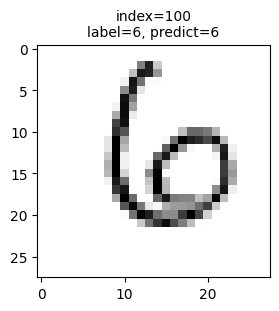

In [8]:
prediction=model.predict(test_images)

plot_image_labels(test_images, test_labels, prediction, 100)

**Evaluating the model on new data**

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9805
test accuracy: 0.9804999828338623
